# IMPORTING LIBRARIES & READING DATASET

In [1]:
import pandas as pd
data = pd.read_csv('predictive_maintenance (1).csv')
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

# PERFORMING DATA PREPROCESSING

In [2]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [3]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
data.describe().T

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [6]:
df = data.groupby(['Failure Type', 'Type'])
df.first()

UDI Product ID  Air temperature [K]  \
Failure Type             Type                                         
Heat Dissipation Failure H     3830     H33243                302.3   
                         L     3761     L50940                302.3   
                         M     3237     M18096                300.8   
No Failure               H       11     H29424                298.4   
                         L        2     L47181                298.2   
                         M        1     M14860                298.1   
Overstrain Failure       H     5400     H34813                302.8   
                         L      161     L47340                298.4   
                         M     3936     M18795                302.6   
Power Failure            H     1124     H30537                296.6   
                         L       51     L47230                298.9   
                         M      195     M15054                298.2   
Random Failures          H     1749     H31162                298.4   
                         L     1303     L48482                298.6   
                         M     1222     M16081                297.0   
Tool Wear Failure        H     1088     H30501                296.9   
                         L       78     L47257                298.8   
                         M     1997     M16856                298.4   

                               Process temperature [K]  \
Failure Type             Type                            
Heat Dissipation Failure H                       310.9   
                         L                       310.9   
                         M                       309.4   
No Failure               H                       308.9   
                         L                       308.7   
                         M                       308.6   
Overstrain Failure       H                       312.4   
                         L                       308.2   
                         M                       311.6   
Power Failure            H                       307.7   
                         L                       309.1   
                         M                       308.5   
Random Failures          H                       307.7   
                         L                       309.8   
                         M                       308.3   
Tool Wear Failure        H                       307.8   
                         L                       308.9   
                         M                       308.0   

                               Rotational speed [rpm]  Torque [Nm]  \
Failure Type             Type                                        
Heat Dissipation Failure H                       1366         48.4   
                         L                       1377         46.8   
                         M                       1342         62.4   
No Failure               H                       1782         23.9   
                         L                       1408         46.3   
                         M                       1551         42.8   
Overstrain Failure       H                       1411         53.8   
                         L                       1282         60.7   
                         M                       1227         68.2   
Power Failure            H                       1386         62.3   
                         L                       2861          4.6   
                         M                       2678         10.7   
Random Failures          H                       1626         31.1   
                         L                       1505         45.7   
                         M                       1399         46.4   
Tool Wear Failure        H                       1549         35.8   
                         L                       1455         41.3   
                         M                       1416         38.2   

                               Tool wear [min]  T

In [7]:
print(data['Type'].unique())
print(data['Failure Type'].unique())

['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


# VISUALIZING THE DATASET

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


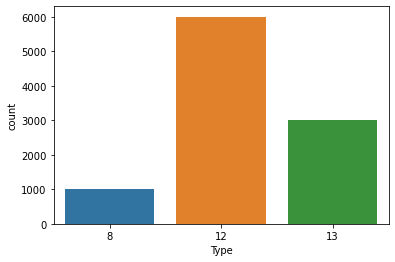

In [39]:
sns.countplot(data['Type'])
plt.show()

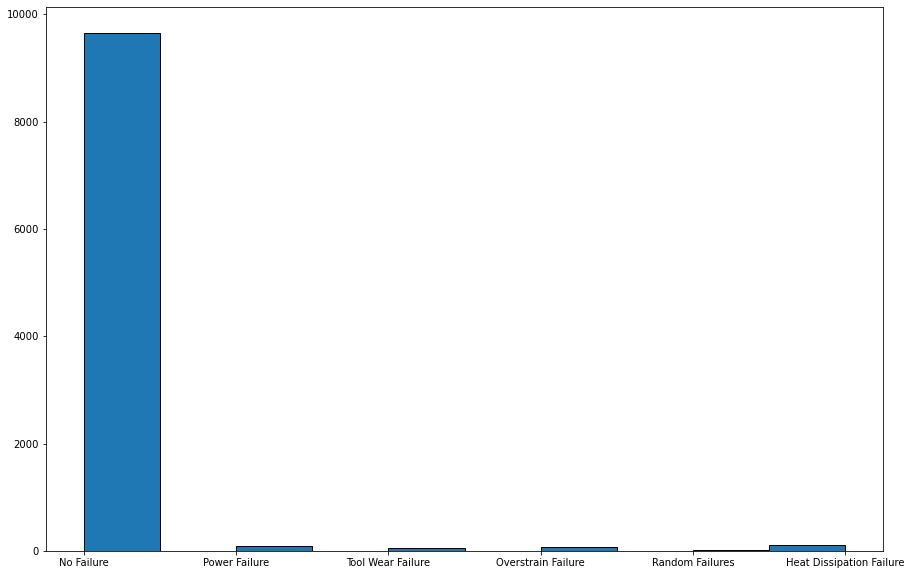

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.hist(x = data['Failure Type'], ec = 'black')
plt.show()

C:\Users\MY-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


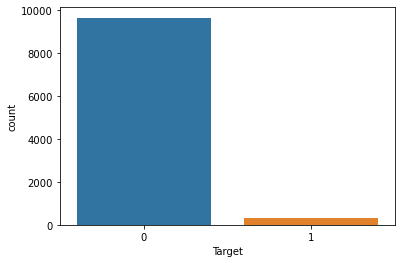

In [9]:
sns.countplot(data['Target'])
plt.show()

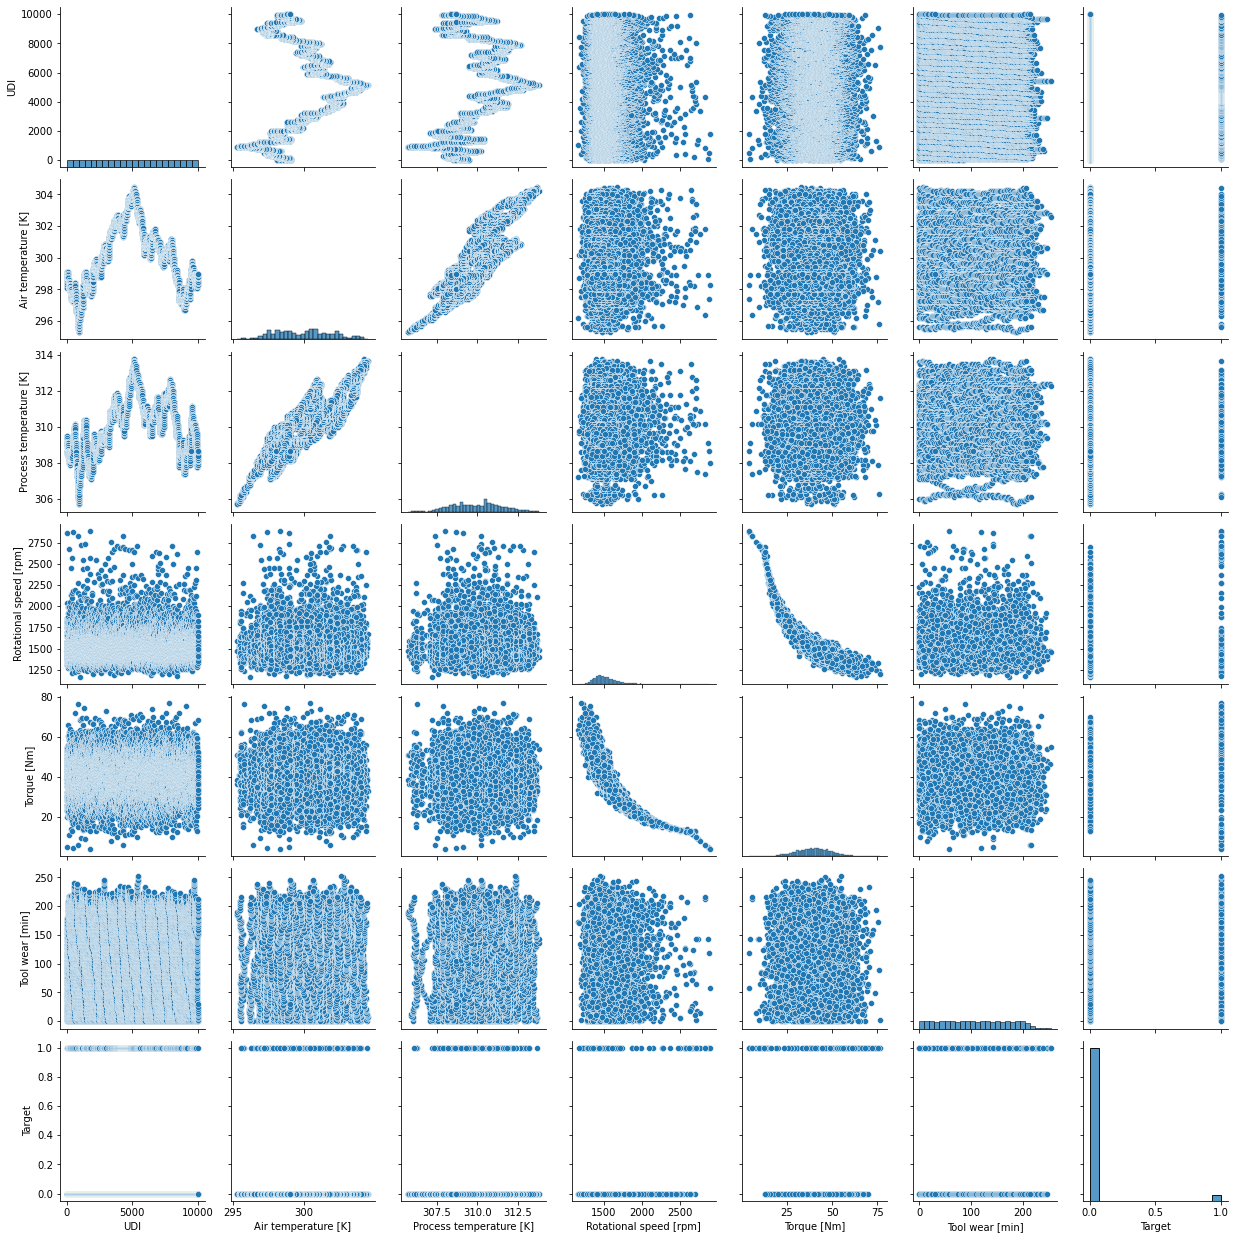

In [10]:
sns.pairplot(data)
plt.show()

In [11]:
data.corr()

UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Target                  -0.022892             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.013488                0.000223   
Target                                  0.035946               -0.044188   

                         Torque [Nm]  Tool wear [min]    Target  
UDI                         0.003207        -0.010702 -0.022892  
Air temperature [K]        -0.013778         0.013853  0.082556  
Process temperature [K]    -0.014061         0.013488  0.035946  
Rotational speed [rpm]     -0.875027         0.000223 -0.044188  
Torque [Nm]                 1.000000        -0.003093  0.191321  
Tool wear [min]            -0.003093         1.000000  0.105448  
Target                      0.191321         0.105448  1.000000

In [12]:
data.min()

UDI                                               1
Product ID                                   H29424
Type                                              H
Air temperature [K]                           295.3
Process temperature [K]                       305.7
Rotational speed [rpm]                         1168
Torque [Nm]                                     3.8
Tool wear [min]                                   0
Target                                            0
Failure Type               Heat Dissipation Failure
dtype: object

In [13]:
data.max()

UDI                                    10000
Product ID                            M24859
Type                                       M
Air temperature [K]                    304.5
Process temperature [K]                313.8
Rotational speed [rpm]                  2886
Torque [Nm]                             76.6
Tool wear [min]                          253
Target                                     1
Failure Type               Tool Wear Failure
dtype: object

In [14]:
data.median()

C:\Users\MY-PC\AppData\Local\Temp/ipykernel_7004/4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


UDI                        5000.5
Air temperature [K]         300.1
Process temperature [K]     310.1
Rotational speed [rpm]     1503.0
Torque [Nm]                  40.1
Tool wear [min]             108.0
Target                        0.0
dtype: float64

In [15]:
print('Target vs Air temperature [K] : ', data['Target'].corr(data['Air temperature [K]'])),
print('Target vs Process temperature [K] : ', data['Target'].corr(data['Process temperature [K]'])),
print('Target vs Rotational speed [rpm] : ', data['Target'].corr(data['Rotational speed [rpm]'])),
print('Target vs Torque [Nm] : ', data['Target'].corr(data['Torque [Nm]']))

Target vs Air temperature [K] :  0.08255568978323986
Target vs Process temperature [K] :  0.03594597332977692
Target vs Rotational speed [rpm] :  -0.0441875597343754
Target vs Torque [Nm] :  0.19132077505949352


In [43]:
data['Failure Type'].replace(['No Failure','Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure'], [1,2,3,4,5,6], inplace=True)

In [44]:
print('Target vs Air temperature [K] : ', data['Failure Type'].corr(data['Air temperature [K]'])),
print('Target vs Process temperature [K] : ', data['Failure Type'].corr(data['Process temperature [K]'])),
print('Target vs Rotational speed [rpm] : ', data['Failure Type'].corr(data['Rotational speed [rpm]'])),
print('Target vs Torque [Nm] : ', data['Failure Type'].corr(data['Torque [Nm]']))

Target vs Air temperature [K] :  0.11848590323491176
Target vs Process temperature [K] :  0.05557937441930225
Target vs Rotational speed [rpm] :  -0.11967960602784054
Target vs Torque [Nm] :  0.1903461103885093


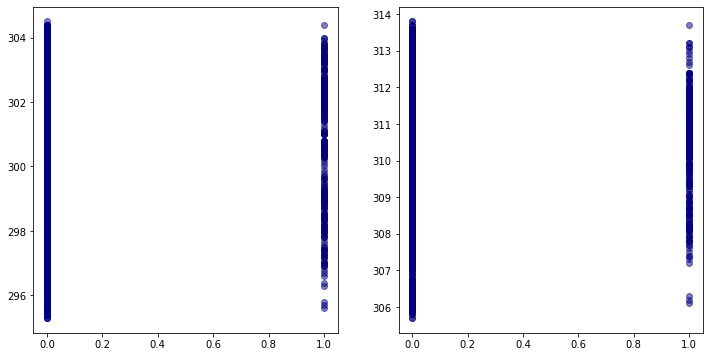

In [16]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.scatter(data['Target'],data['Air temperature [K]'], color = 'navy', alpha = 0.5)

plt.subplot(1,2,2)
plt.scatter(data['Target'], data['Process temperature [K]'], color = 'navy', alpha = 0.5)

plt.show()

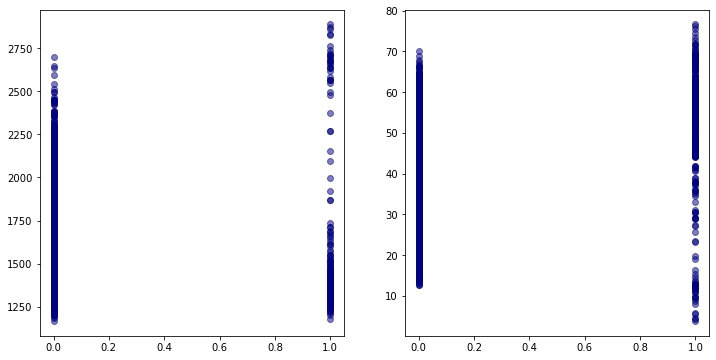

In [17]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.scatter(data['Target'], data['Rotational speed [rpm]'], color = 'navy', alpha = 0.5)

plt.subplot(1,2,2)
plt.scatter(data['Target'], data['Torque [Nm]'], color = 'navy', alpha = 0.5)

plt.show()

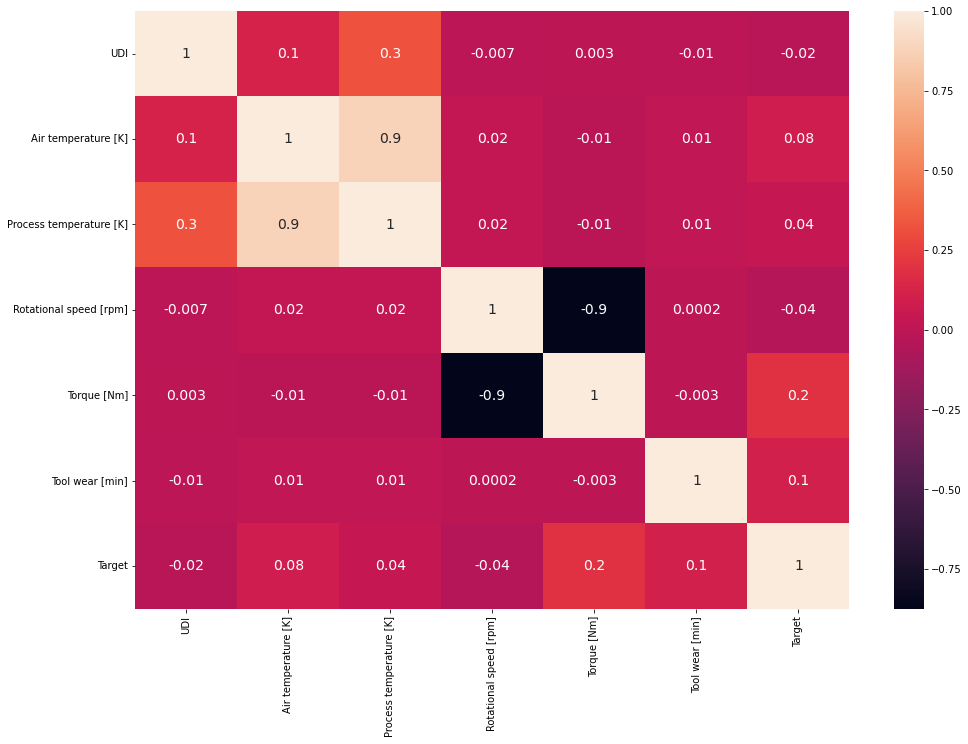

In [18]:
plt.figure(figsize = (16,11))
sns.heatmap(data.corr(), annot = True, annot_kws={'size': 14}, fmt = '.1g', mask=None)
plt.show()

In [19]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\MY-PC\AppData\Local\Temp/ipykernel_7004/4228493054.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
%%time
profile = ProfileReport(data,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Akshay Kumar",
                                 "copyright_holder": "Akshay kumar",
                                 "copyright_year": "2023",
                                },
                        explorative=True,
                       )
profile

Wall time: 48.7 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
data['Type'].replace(['M', 'L', 'H'], [13, 12, 8], inplace=True)

# BUILDING THE MODEL

In [22]:
target = data['Failure Type']
target

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 10000, dtype: object

In [23]:
features = data.drop(['Failure Type', 'Product ID'], axis = 1)
features

UDI  Type  Air temperature [K]  Process temperature [K]  \
0         1    13                298.1                    308.6   
1         2    12                298.2                    308.7   
2         3    12                298.1                    308.5   
3         4    12                298.2                    308.6   
4         5    12                298.2                    308.7   
...     ...   ...                  ...                      ...   
9995   9996    13                298.8                    308.4   
9996   9997     8                298.9                    308.4   
9997   9998    13                299.0                    308.6   
9998   9999     8                299.0                    308.7   
9999  10000    13                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 8 columns]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [25]:
from sklearn import svm

model = svm.LinearSVC()
model.fit(x_train, y_train)

C:\Users\MY-PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [26]:
model.score(x_train, y_train)

0.966375

In [27]:
model.score(x_test, y_test)

0.971

# EVALUATING THE MODEL

In [28]:
prediction = model.predict(x_test)
prediction

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype=object)

In [29]:
score = model.score(x_train, y_train)
score

0.966375

In [30]:
score_val = model.score(x_test ,y_test)
score_val

0.971

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(prediction, y_test)
conf_mat

array([[   0,    0,    0,    0,    0,    0],
       [  15, 1935,   14,   12,    5,    8],
       [   1,    0,    0,    1,    0,    0],
       [   0,    2,    0,    7,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0]], dtype=int64)

In [32]:
conf_mat.shape

(6, 6)

In [33]:
nr_rows = conf_mat.shape[0]
nr_cols = conf_mat.shape[1]

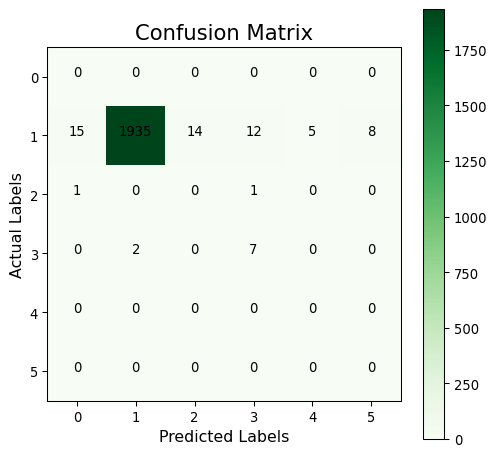

In [34]:
import itertools
plt.figure(figsize=(6,6), dpi=95)

plt.imshow(conf_mat, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    
    plt.text(j,i,conf_mat[i,j],horizontalalignment = 'center')

plt.colorbar()

plt.show()

In [35]:
# True Positives
import numpy as np
np.diag(conf_mat)

array([   0, 1935,    0,    7,    0,    0], dtype=int64)

In [36]:
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
recall

C:\Users\MY-PC\AppData\Local\Temp/ipykernel_7004/2268408136.py:1: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diag(conf_mat) / np.sum(conf_mat, axis=1)


array([       nan, 0.97285068, 0.        , 0.77777778,        nan,
              nan])

In [37]:
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
precision

array([0.        , 0.99896748, 0.        , 0.35      , 0.        ,
       0.        ])

In [38]:
avg_recall = np.mean(recall)
print(avg_recall)
avg_precision = np.mean(precision)
print(avg_precision)

nan
0.22482791257959045
